## Data Cleaning and Analysis

IGN data set

Use the IGN game review data set to answer the following questions:

- What’s the first game ever released?
- How do the game scores vary from year to year?
- What’s the platform with the highest average reviews?
- Are blockbuster games (“Amazing”, “Masterpiece”) released at a specific time of the year?

**Bonus**: And what if we wanted to analyse sales too? Try to merge the IGN data set with this data set on video game sales: https://www.kaggle.com/gregorut/videogamesales

**NOTE**: Make sure you commit and push your changes to your gitlab project.

In [2]:
import pandas as pd
import matplotlib as plt

In [3]:
data = pd.read_csv('/Users/szewing/Desktop/Course/CDBootcamp/debbie_to/01_DSToolkit/day2/ign.csv')
data.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [4]:
# import os
# home_dir = os.path.expanduser("~")
# print(home_dir)

In [5]:
data.sort_values(['release_year', 'release_month', 'release_day']).head(5)[["title", "release_year", "release_month", "release_day"]]
# first game ever released.

,title,release_year,release_month,release_day
516,The Walking Dead: The Game -- Episode 1: A New...,1970,1,1
515,Baku Baku,1996,6,18
488,Pilotwings 64,1996,9,25
514,Super Mario 64,1996,9,25
487,Batman Forever: The Arcade Game,1996,11,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18625 non-null  int64  
 1   score_phrase    18625 non-null  object 
 2   title           18625 non-null  object 
 3   url             18625 non-null  object 
 4   platform        18625 non-null  object 
 5   score           18625 non-null  float64
 6   genre           18589 non-null  object 
 7   editors_choice  18625 non-null  object 
 8   release_year    18625 non-null  int64  
 9   release_month   18625 non-null  int64  
 10  release_day     18625 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 1.6+ MB


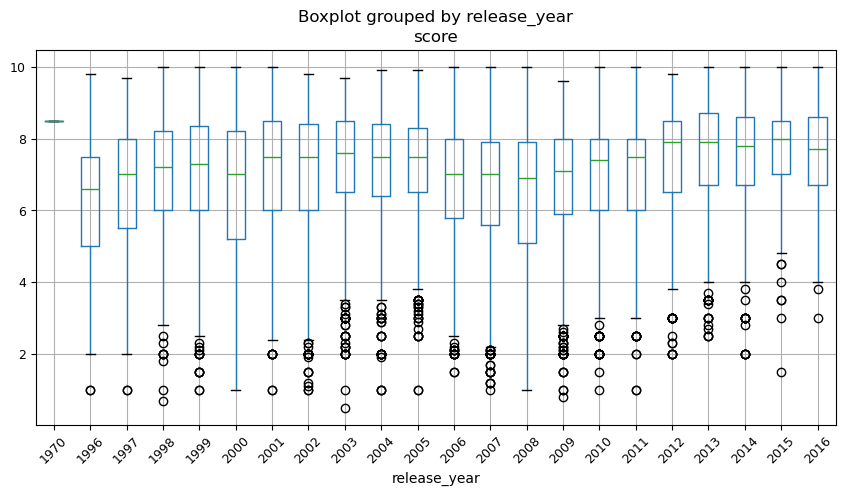

In [7]:
_ = data.boxplot(column='score', by='release_year', figsize=(10, 5), fontsize=9, rot=45)

In [ ]:
data["platform"].value_counts()     #streamOS has only one count => should set some thresholds for the groupby

platform
PC                      3370
PlayStation 2           1686
Xbox 360                1631
Wii                     1366
PlayStation 3           1356
Nintendo DS             1045
PlayStation              952
Wireless                 910
iPhone                   842
Xbox                     821
PlayStation Portable     633
Game Boy Advance         623
GameCube                 509
Game Boy Color           356
Nintendo 64              302
Dreamcast                286
PlayStation 4            277
Nintendo DSi             254
Nintendo 3DS             225
Xbox One                 208
PlayStation Vita         155
Wii U                    114
iPad                      99
Lynx                      82
Macintosh                 81
Genesis                   58
NES                       49
TurboGrafx-16             40
Android                   39
Super NES                 33
NeoGeo Pocket Color       31
N-Gage                    30
Game Boy                  22
iPod                      17
Sega 

In [15]:
data[data['platform'].value_counts >= 5]

TypeError: '>=' not supported between instances of 'method' and 'int'

In [8]:
data.groupby("platform").agg(average_score=("score", "mean")).sort_values("average_score", ascending=False).head(5)
# the platform with the highest average reviewsis SteamOS

,average_score
platform,
SteamOS,8.900000
WonderSwan Color,8.600000
Pocket PC,8.500000
Macintosh,8.120988
Ouya,8.000000


In [ ]:
# blockbuster game
# groupby release_month by month for the entire dataset.

### Merge with Sales Data

In [ ]:
import kagglepath

path = kaggle